# Data Intelligence Exam

Jonas Skjødt | skjo@itu.dk | Date: 2025-26-05  

## Introduction

This paper will journal the census-1994.csv dataset. As per the description of the dataset: "Census data from USA gathered in 1994. Contains demographic information about US citizens. These values are self-reported by the participating citizens."

First..

They give an overview of the report the have written and the different steps they will go through.

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

We import the libraries we need, pandas for the data intelligence, seaborn and mapplotlib for visualization.

# Exploration
In the exploration phase we'll try to understand the data set better. As a start, let's make sure the columns match the handed out description of what the data set entails.

In [3]:
df = pd.read_csv('census-1994.csv')
df.columns.tolist()

['age',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_bracket']

The correct columns are all there, let's continue the exploration.

In [39]:
df.head()

,age,workclass,education,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_bracket
0,39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [27]:
educationColumn = df['education'].value_counts()
print(educationColumn)

workclassColumn = df['workclass'].value_counts()
print(workclassColumn)

education
HS-grad         10199
Some-college     7044
Bachelors        5160
Masters          1669
Assoc-voc        1347
11th             1124
?                1043
Assoc-acdm       1031
10th              914
7th-8th           625
Prof-school       560
9th               498
12th              415
Doctorate         404
5th-6th           320
1st-4th           158
Preschool          50
Name: count, dtype: int64
workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64


In [ ]:
count1 = df['capital_gain'].describe()
print(count1)



count    32561.000000
mean      1077.648844
std       7385.292085
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital_gain, dtype: float64


There seems to be some missing values here and there in the data, outlined amongst others in the columns like "education" and "workclass" with a "?" value. We'll take care of the missing values in the preproccessing later. Let's take a quick look with a visualization of the capital_gain column.

Text(0.5, 1.0, 'Non Zero Capital Gains')

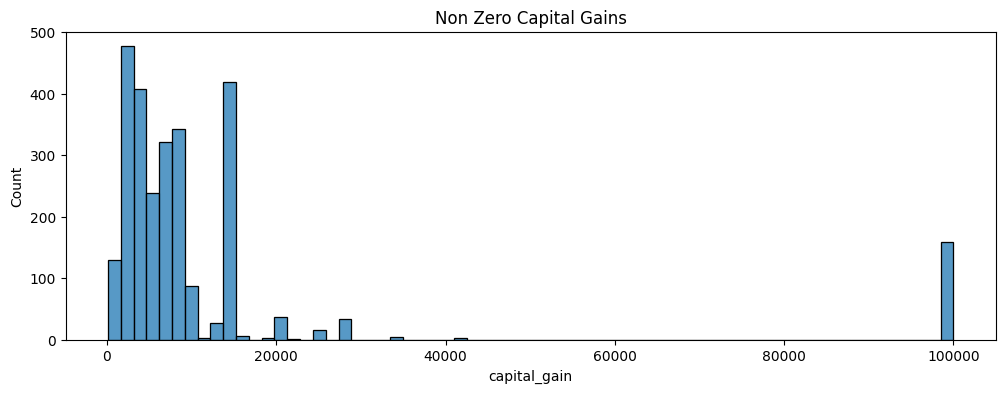

In [28]:
plt.figure(figsize=(12,4))
sns.histplot(df[df['capital_gain'] > 0] ['capital_gain'])
plt.title('Non Zero Capital Gains')

According to https://www.herskovitslaw.com/blog/evolution-of-publicly-traded-stock-ownership-in-the-us-1990s-2016/, approx 40% of Americans owned stocks in around 1994. So this is slightly reflecting real world economic behavior in 1994, where homes were held over a long period of time and the majority of Americans were working class.

In the data, 99999 shows as the max value - which could indicate that thats the capped extreme value. There is also the possibility that the legacy systems of 1994 had fixed numeric inputs. However, for this assignment I will assume it was capped for a reason, perhaps as a display for anonymonity for the very wealthy. This is further illustrated below since there's multiple values at the max with the number 99999.

In [32]:
print(f"Amount of 99999: {(df['capital_gain'] == 99999).sum()}")

Amount of 99999: 159


Let's also make sure 99999 is only in capital_gain column and not something to determine the cap of other columns too.

In [74]:
print(f"Rows with 99999 capital gain: {len(df[df['capital_gain'] == 99999])}")

Rows with 99999 capital gain: 159


Let's explore further, do we see the same trends in the column capital_loss?

In [ ]:
print(df['capital_loss'].describe())

# Check if 99999 is with what we expect
top = df[df['capital_gain'] == 99999]
print(f"Percentage top: {len(top)/len(df):.2%}")

# Compare
print(f"Capital loss max: {df['capital_loss'].max()}")

count    32561.000000
mean        87.303830
std        402.960219
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital_loss, dtype: float64
Percentage top: 0.49%
Capital loss max: 4356


The percentage 0.49% is correct as we already established 159 out of 32561 recorded values at set at (repeated) 99999 values.

Otherwise there doesnt seem to be any suspicious numbers in the capital_loss column, as its max is set at 4356.

99999 doesnt seem like an outlier. The system at the time shows it can store lower values, and in a historical view, in 1994 houses were sold for around $154175 (https://www.amortization.org/inflation/item/us-home-prices-in-1994-adjusted-for-inflation), and most likely privacy for the top earners.

The rest of the data set seems straight forward with nothing unusual, indicating the status of education, occupation, age, etc..

# Research questions and hypothesis
On the basis of the data exploration, these are the research questions I'll continue with.

What is the wealth balance like in America 1994 - do those with high capital gain (>= $50K)corrolate with executive occupations or trading (asset sales)?

And is there a systemic bias based on race or gender, showing an imbalance in income? - For instance, do women or have less income than men with equivalent gains?

### Preprocessing
Let's start by cleaning up the dataset to examine the data further. We'll try going by Hadley Wicham's tidy data principles (https://vita.had.co.nz/papers/tidy-data.pdf)

In [75]:
# convert '?' to 'unknown'
cols_with_missing = ['education', 'workclass', 'occupation', 'gender', 'native_country']
df[cols_with_missing] = df[cols_with_missing].replace(' ?', 'unknown')

# verify if the replacement worked
print(df.isin([' ?']).sum())

age               0
workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
gender            0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income_bracket    0
dtype: int64


" ?" is replaced with "unknown" to indicate a better wording for the value. The reason why the values were inserted by the American individual as " ?", was most likely how none of the values to pick from matched their experiences, or they wanted to have anonymonity. In either case, let's keep these values as unknowns to not lose any data.

In [152]:
# Clean ALL string-type columns (including 'object' and 'category')
str_cols = df.select_dtypes(include=['object', 'category']).columns

df[str_cols] = df[str_cols].apply(
    lambda x: x.str.strip() if x.dtype == 'object' else x.replace(' ?', 'unknown').str.strip()
)

# Verify cleanup
for col in str_cols:
    weird_spaces = df[col].astype(str).str.contains(r'^\s|\s$').sum()
    print(f"{col}: {weird_spaces} leading/trailing spaces (should be 0)")

workclass: 0 leading/trailing spaces (should be 0)
education: 0 leading/trailing spaces (should be 0)
marital_status: 0 leading/trailing spaces (should be 0)
occupation: 0 leading/trailing spaces (should be 0)
relationship: 0 leading/trailing spaces (should be 0)
race: 0 leading/trailing spaces (should be 0)
gender: 0 leading/trailing spaces (should be 0)
native_country: 0 leading/trailing spaces (should be 0)
income_bracket: 0 leading/trailing spaces (should be 0)


all of the columns had a trailing space as well, we've now cleaned it so theres not space-

### Examination of data

We'll try to answer the questions by looking at the relationships between different variables in the data. Starting with the first question, "Do those with high capital gain (>= $50K)corrolate with executive occupations or trading (asset sales)?"

In [141]:
# filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# group by occupation and count
# print(df['occupation'].value_counts())
occupation_counts = high_gainers['occupation'].value_counts().reset_index()
occupation_counts.columns = ['occupation', 'count']
# sort by count
best_occupation = occupation_counts.sort_values(by='count', ascending=False).head(10)

print(best_occupation)

           occupation  count
0      Prof-specialty     67
1     Exec-managerial     42
2               Sales     25
3        Craft-repair      8
4        Adm-clerical      6
5             unknown      4
6       Other-service      2
7   Machine-op-inspct      1
8    Transport-moving      1
9     Protective-serv      1


The highest earning individuals are already mostly in high paying (1994) jobs. Prof-speciality (highly specialised, like medicin, law, etc.) are the highest asset earners. Those who do sales as their occupation are lower than the ones that Exec-managerial and Prof-specialty. This could indicate a trend towards frequent smaller sales vs bigger payouts.



In [142]:
high_gainers = df[df['capital_gain'] > 50000]
print(high_gainers['workclass'].value_counts())

print(high_gainers.groupby('occupation')['age'].median())

workclass
 Private             82
 Self-emp-inc        36
 Self-emp-not-inc    29
 Local-gov            6
unknown               4
 Federal-gov          1
 State-gov            1
Name: count, dtype: int64
occupation
 Adm-clerical         44.0
 Craft-repair         52.5
 Exec-managerial      48.0
 Handlers-cleaners    42.0
 Machine-op-inspct    33.0
 Other-service        45.5
 Prof-specialty       46.0
 Protective-serv      21.0
 Sales                46.0
 Tech-support         48.0
 Transport-moving     30.0
unknown               59.5
Name: age, dtype: float64


Checking the workclass data of the high assert earners, it further shows how Private is dominating. Private suggests well earning jobs at private corporations, usually with added benefits as stock benefits.

In [153]:
# filter for high capital gainers
high_gainers = df[df['capital_gain'] > 50000]

# top by education
edu_occuption = high_gainers.groupby(['occupation', 'education']).size().unstack()

print(edu_occuption.loc[['Prof-specialty', 'Exec-managerial', 'Sales']])

education        10th  9th  Assoc-acdm  Assoc-voc  Bachelors  Doctorate  \
occupation                                                                
Prof-specialty    NaN  NaN         1.0        1.0        8.0        8.0   
Exec-managerial   NaN  NaN         NaN        NaN       14.0        3.0   
Sales             NaN  NaN         NaN        NaN       11.0        1.0   

education        HS-grad  Masters  Prof-school  Some-college  unknown  
occupation                                                             
Prof-specialty       2.0      5.0         41.0           NaN      1.0  
Exec-managerial      6.0     10.0          5.0           3.0      1.0  
Sales                5.0      3.0          NaN           5.0      NaN  


As the data shows, the people behind the high numbers have varying degrees. The Prof-specialty all have advanced degrees and teach at schools (41 out of 67 have the education level of Prof-school, usually indicating lawyers, doctors, etc..), while this educational level becomes a balanced mix as we go to Exec-managerial and sales positions.

In [144]:
# using income_bracket to make sure we are looking at actual high earners
cross_tab = pd.crosstab(high_gainers['income_bracket'], high_gainers['occupation'])
print(cross_tab)

occupation       Adm-clerical   Craft-repair   Exec-managerial  \
income_bracket                                                   
>50K                        6              8                42   

occupation       Handlers-cleaners   Machine-op-inspct   Other-service  \
income_bracket                                                           
>50K                             1                   1               2   

occupation       Prof-specialty   Protective-serv   Sales   Tech-support  \
income_bracket                                                             
>50K                         67                 1      25              1   

occupation       Transport-moving  unknown  
income_bracket                              
>50K                            1        4  


As a small check, all high asset earning individuals are also people who earn over 50k dollars a year.

For the next question, "And is there a systemic bias based on race or gender, showing an imbalance in income? - For instance, do women or have less income than men with equivalent gains?" We'll start taking a look at the income by gender and race.

In [145]:
# gender
gender_income = df.groupby(['gender', 'income_bracket']).size().unstack()
gender_income_pct = gender_income.div(gender_income.sum(axis=1), axis=0) * 100
print("Income by Gender (%):")
print(gender_income_pct.round(1))

# race
race_income = df.groupby(['race', 'income_bracket']).size().unstack()
race_income_pct = race_income.div(race_income.sum(axis=1), axis=0) * 100
print("\nIncome by Race (%):")
print(race_income_pct.round(1))

Income by Gender (%):
income_bracket  <=50K  >50K
gender                     
 Female          89.1  10.9
 Male            69.2  30.8
unknown          78.9  21.1

Income by Race (%):
income_bracket      <=50K  >50K
race                           
Amer-Indian-Eskimo   88.4  11.6
Asian-Pac-Islander   73.4  26.6
Black                87.6  12.4
Other                90.8   9.2
White                74.4  25.6


The data shows how males are almost three times more likely to earn > 50k a year than females, showing how females earn 10.9% and males 30.8% above 50 k. (the unknown here is a smaller sample size and means little).

The data also shows how white and Asian-Pac-Islander have amost double the change of earning above 50k compared to Amer-Indian-Eskimo, black and others. This is further visualized below, showing less women earning >50k and white/asians earning more than any other race.

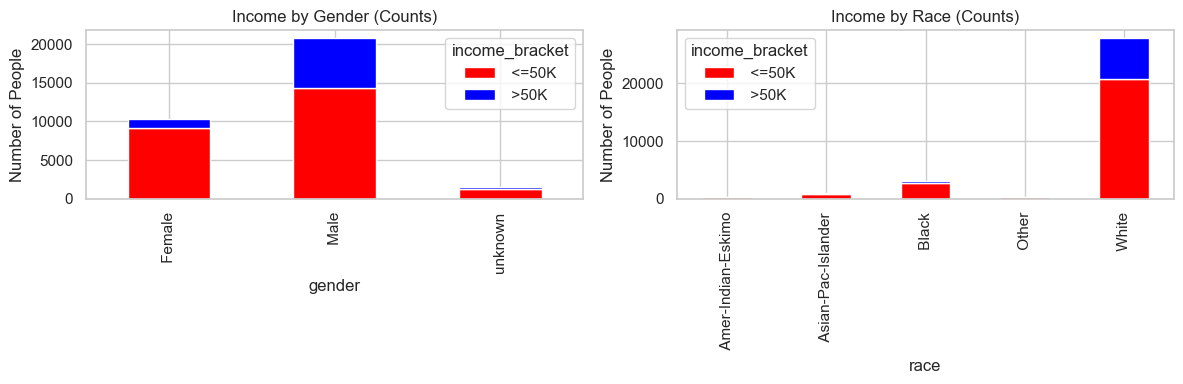

In [146]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# Gender plot
gender_income.plot(kind='bar', stacked=True, ax=ax1, color=['red','blue'])
ax1.set_title('Income by Gender (Counts)')
ax1.set_ylabel('Number of People')

# Race plot (top 5 races)
race_income.head(5).plot(kind='bar', stacked=True, ax=ax2, color=['red','blue'])
ax2.set_title('Income by Race (Counts)')
ax2.set_ylabel('Number of People')

plt.tight_layout()
plt.show()

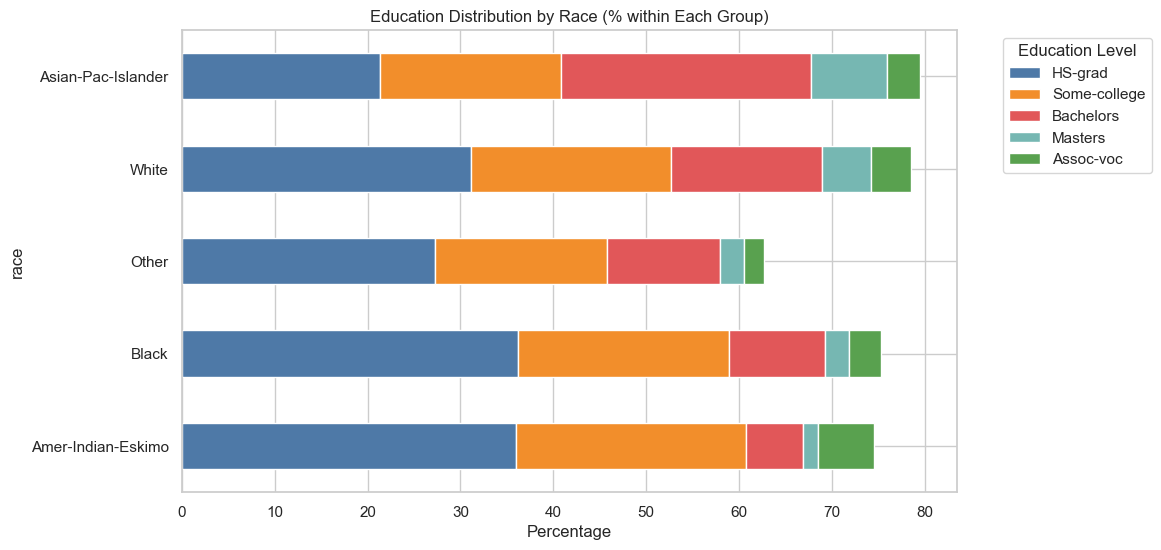

In [156]:
education_by_race = df.groupby(['race', 'education']).size().unstack()

# Calculate percentages within each race
education_pct = education_by_race.div(education_by_race.sum(axis=1), axis=0) * 100

# Plot top 5 education levels for clarity
top_educations = ['HS-grad', 'Some-college', 'Bachelors', 'Masters', 'Assoc-voc']
education_pct[top_educations].sort_values('Bachelors', ascending=True).plot(
    kind='barh', 
    stacked=True,
    figsize=(10, 6),
    color=['#4e79a7', '#f28e2b', '#e15759', '#76b7b2', '#59a14f']
)

plt.title('Education Distribution by Race (% within Each Group)')
plt.xlabel('Percentage')
plt.legend(title='Education Level', bbox_to_anchor=(1.05, 1))
plt.show()

Looking at the corrolation between education and race, we find

# Analysis
Investigating the data correlations (could be heatmap or any other plot showing the trends or tendencies)

### examination of the hypothesis'

"Do those with high capital gain (>= $50K)corrolate with executive occupations or trading (asset sales)?"

in the start of the 90s high earning capital gain is dominated by Prof-school and other long educations. In the U.S. 1990s this was typically lawyers, doctors, professors, or other highly educated societal members. These individuals usually have insights, either from education or social circles, and enough money to invest. This tendency is also shown in the number of individuals working with sales, understanding investing which has lead to a greater asset earning.



C:\Users\jonas\AppData\Local\Temp\ipykernel_26180\3365595021.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=high_gainers, y='occupation',


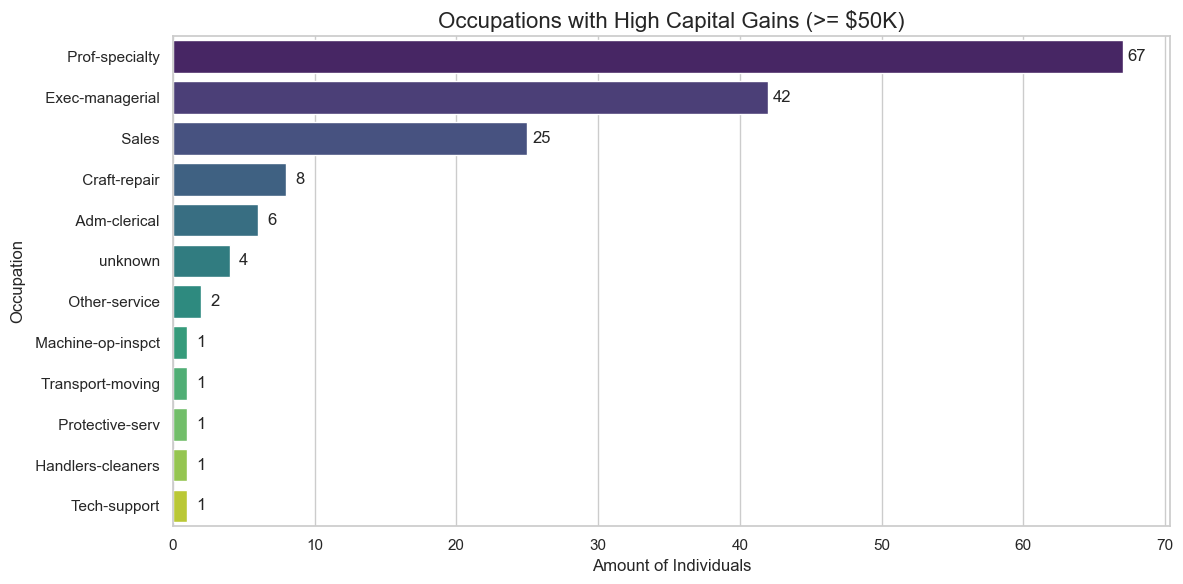

In [106]:
# Filter for high capital gainers
high_gainers = df[df['capital_gain'] >= 50000]

# Create countplot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=high_gainers, y='occupation', 
                   order=high_gainers['occupation'].value_counts().index,
                   palette='viridis')

# Add annotations
for p in ax.patches:
    width = p.get_width()
    plt.text(width + 1, p.get_y() + p.get_height()/2, 
             '{:1.0f}'.format(width),
             ha='center', va='center')

# Customize plot
plt.title('Occupations with High Capital Gains (>= $50K)', fontsize=16)
plt.xlabel('Amount of Individuals', fontsize=12)
plt.ylabel('Occupation', fontsize=12)
plt.tight_layout()
plt.show()

As the visualization shows, there is a clear concensus that highly educated, high earning occupations usually leads to greater asset earning income. 

# Conclusion
what have i learned

# references
sources from the course or the links we've used, citations etc.